# Python Básico para Computação Numérica 2

### Anotações #1
Plotar a função é escolher diversos pontos x e no ponto 1 ver f(1)
Geralmente estamos interessados em valores em x linearmente espaçados(pra ficar com a resolução +- igual) entre intervalo [a,b].


Visualizar informações é importantíssimo em Computação Numérica

_Plotar_ uma função é desenhar a mesma em um eixo de coordenadas, normalmente através da escolha de _N_ pontos da função, calculndo seus valores, e desenhando retas (ou curvas) entre eles. Quanto mais pontos usados, mais suave é a curva.

Normalmente o processo de plot involve gerar dois vetores _x_ e _y_, com _x_ contendo o valor no eixo das abcissas, e _y_ o valor no eixo das ordendas.

Ex: _x_ contendo valores linermente espaçados em um intervalo [a,b], e _y_ contendo os valores de $f(x),\forall x$



## Gráficos Básicos

A biblioteca que usaremos para manipulação de gráficos em Python é a MatPlotLib. Usaremos ela não apenas por ser a mais popular e poderosa, mas também por ela ser +- compatível com o Matlab, que vocês tem chance de encontrar por aí. 

In [1]:
# !pip3 install matplotlib --user
import matplotlib.pyplot as plt
%matplotlib inline

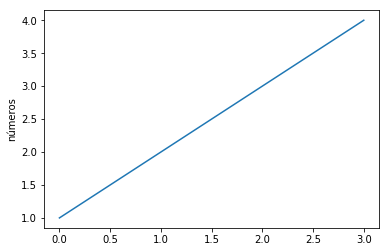

In [2]:
#para criar um gŕafico se cria um plot e depois altera os dados que são necessários do gráfico.
plt.plot([1,2,3,4]) #se só tiver um vetor ele assume que isso é o y e o x são valores igualmente espaçados
#funcionamento do comando plot : gerar um gráfico e dizer quais são os comandos dessess gráfico
plt.ylabel('números') # nome do eixo y é "números".
plt.show()

De onde veio esse eixo x? Se o plot só recebe um vetor, ele assume que o eixo X são números monoespaçados iniciando de 0

No geral, num plot se espera pelo menos dois vetores _x_ e _y_, ou ainda mais.

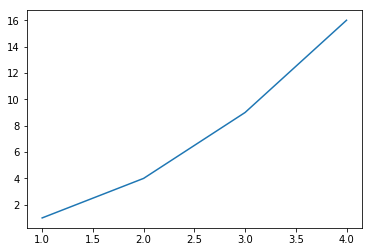

In [3]:
 plt.plot([1, 2, 3, 4], [1, 4, 9, 16]) #plot(eixo x, eixo y) 
    #quando x = 1, y = 1
    #quando x = 2, y = 4
    #isso é uma função quadrática
    #quanto mais pontos mais suaves o gráfico fica.

Um terceiro argumento possível para o plot é uma string que define qual o estilo da linha plotada. O padrão é 'b-', o que é uma linha azul. Por exemplo, para círculos vermelhos, use:

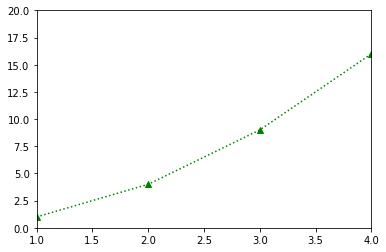

In [4]:
plt.plot([1,2,3,4], [1,4,9,16], 'g^:') #esse o marca os pontos no gráfico e o -- é pra dizer que a linha é dashed
plt.axis([1, 4, 0, 20]) #esses valores são os intervalos de desenho do eixo x e eixo y(limites do eixo 1-x:4, limite do eixo 2- y: 20)
plt.show()

In [5]:
help(plt.axis)

Help on function axis in module matplotlib.pyplot:

axis(*v, **kwargs)
    Convenience method to get or set axis properties.
    
    Calling with no arguments::
    
      >>> axis()
    
    returns the current axes limits ``[xmin, xmax, ymin, ymax]``.::
    
      >>> axis(v)
    
    sets the min and max of the x and y axes, with
    ``v = [xmin, xmax, ymin, ymax]``.::
    
      >>> axis('off')
    
    turns off the axis lines and labels.::
    
      >>> axis('equal')
    
    changes limits of *x* or *y* axis so that equal increments of *x*
    and *y* have the same length; a circle is circular.::
    
      >>> axis('scaled')
    
    achieves the same result by changing the dimensions of the plot box instead
    of the axis data limits.::
    
      >>> axis('tight')
    
    changes *x* and *y* axis limits such that all data is shown. If
    all data is already shown, it will move it to the center of the
    figure without modifying (*xmax* - *xmin*) or (*ymax* -
    *ymin*)

O que o comando `plt.axis()` faz?

Uma vantagem do Matplotlib é que ele funciona com o Numpy (incluindo as vantagens da vetorização). 

Ex: Vamos plotar diversas operações sobre o mesmo conjunto de dados (`t`) em uma única imagem, usando plot com diversos parâmetros:

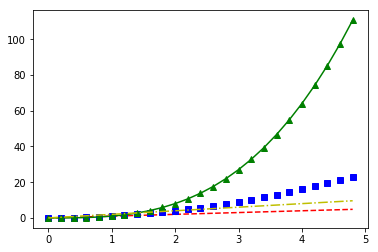

In [6]:
import numpy as np
t = np.arange(0., 5., 0.2) #do 0 até o 5 ele vai aumentando de 0.2 em 0.2

# 2 modos de fazer um gráfico com várias funções, chamar um comando plot com vários parâmetros de diversas funções
# ou chamar vários plots para cada função.
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^-') #formato: (x, y, estilo)
plt.plot(t,t*2,'y-.')
plt.show()

Se você quiser plotar um único ponto, você pode usar no lugar das listas com pontos apenas um:

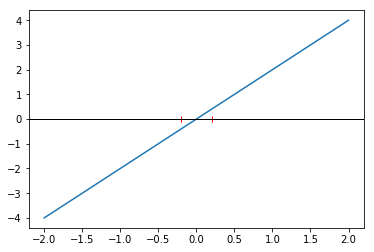

In [7]:
x = np.array([-2,-1,0,1,2])
y = x*2

plt.plot(x,y,-0.2,0,'r|',0.2,0,'r|')
plt.axhline(0, color='black',linewidth=1)


### Plotando funções

Para plotar funções é bem simples:

- Primeiro você define a função 
- Depois os pontos X
- Em seguida você plota X, f(X)

Exemplo:

Plotar \begin{equation}f(x)=\frac{e^{x}-1}{x}\end{equation} para o intervalo $[1,7]$

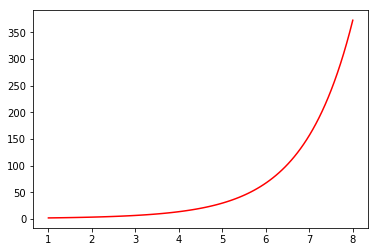

In [8]:
def funcao(x):
    return (np.exp(x)-1)/x

x = np.linspace(1,8,100)#pega números igualmente espaçados entre esse intervalo
y = funcao(x)
plt.plot(x,y,'r-')

### Exercícios

Plote 

\begin{equation}h(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}\end{equation}

Para o intervalo [-4,4] com 41 pontos

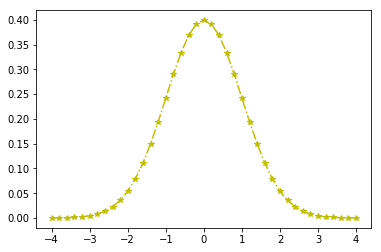

In [9]:
def h(x):
    return (1/np.sqrt(2*np.pi)) * np.exp((-1/2)*x**2)

x = np.linspace(-4,4,41)
y = h(x)
plt.plot(x,y,'y*-.')

### Mudando propriedades de linhas

Linhas em gráficos tem diversos atributos modificáveis (verifique matplotlib.lines.Line2D com o help para mais detalhes). Como alterar? tem três formas:

- Keywords no plot:

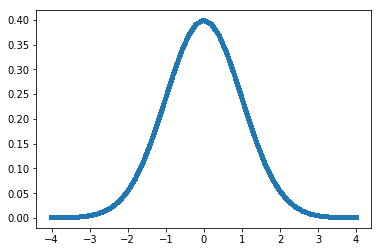

In [10]:
plt.plot(x,y,linewidth=4.0,antialiased=False)

- Metodos Set: a função plot retorna uma lista de objetos referente a cada uma das linhas criadas, e você pode usar funções dele pra alterar valores

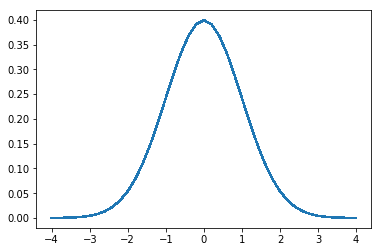

In [11]:
linha, = plt.plot(x,y,'-')
linha.set_antialiased(False)

- Função setp(), que pode alterar várias propriedades ao mesmo tempo:

[None, None, None]

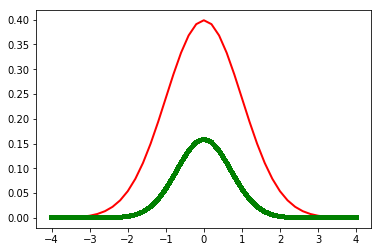

In [12]:
linhas = plt.plot(x,y,x,y**2)

plt.setp(linhas[0],color='r',linewidth=2.0)
plt.setp(linhas[1],color='g',linewidth=4.0,aa=False)

Lista de possíveis atributos:

In [13]:
plt.setp(linha)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: bool 
  antialiased or aa: bool 
  clip_box: a `.Bbox` instance 
  clip_on: bool 
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None] 
  color or c: any matplotlib color 
  contains: a callable function 
  dash_capstyle: ['butt' | 'round' | 'projecting'] 
  dash_joinstyle: ['miter' | 'round' | 'bevel'] 
  dashes: sequence of on/off ink in points 
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' | 'steps-post'] 
  figure: a `.Figure` instance 
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none'] 
  gid: an id string 
  label: object 
  linestyle or ls: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-off-dash-seq) | ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'None'`` | ``' '`` | ``''``]
  linewidth or lw: float value in points 
  marker: :mod:`A valid 

## Múltiplas imagens e eixos

Podemos trabalhar com múltiplas figuras em um único plot, usando o conceito de subplot:

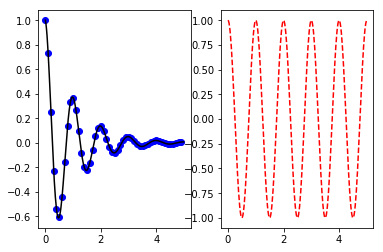

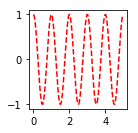

In [14]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(2) #vai dizer quantas figuras tem no plot
plt.subplot(1,2,1) # é uma figura só que vai ter tantas linhas e tantas colunas e especifica em qual linha, coluna vai se dizer onde se está trabalhando
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(1,2,2)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

plt.subplot(2,3,3)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()


O comando `subplot()` recebe como parâmetro `nlinhas,ncolunas,indice`, onde `indice` é um número entre 1 e `nlinhas*ncolunas` (subplot pode ser feito tmbém sem as vírgulas como nos exemplos)

/home/icomp/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Titulo do primeiro grafico')

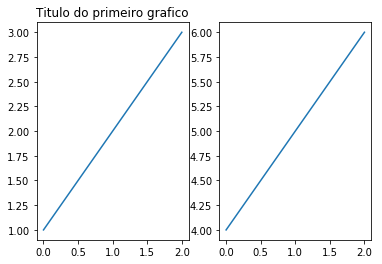

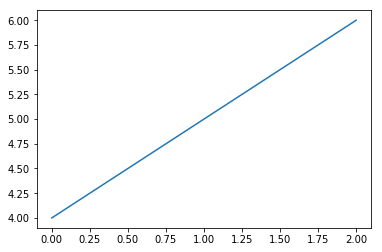

In [15]:
plt.figure(1)  #figura um              
plt.subplot(121)        # vai ter uma linha e duas colunas, estou trabalhando com o índice 1     
plt.plot([1, 2, 3]) 
plt.subplot(122)             
plt.plot([4, 5, 6])


plt.figure(2)  # Cria uma nova figura              
plt.plot([4, 5, 6])          

plt.figure(1)  # Volta para a primeira figura
plt.subplot(121)             
plt.title('Titulo do primeiro grafico') 

### Exercício:

Plote as funções \begin{equation}f_{1}(t)=t^{2}e^{-t^{2}}\end{equation} e \begin{equation}f_{2}(t)=t^{4}e^{-t^{2}}\end{equation} em uma mesma imagem:

Text(0.5,1,'Titulo do segundo grafico')

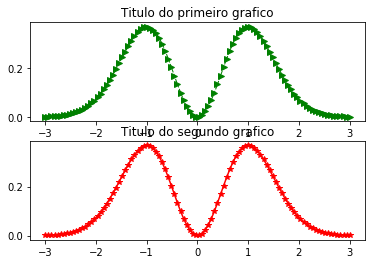

In [16]:
def f1(t):
    return t**2 * np.exp(-t**2)

def f2(t):
    return t**2 * np.exp(-t**2)

x = np.linspace(-3,3,100)

plt.clf()

plt.figure(1)
plt.subplot(211)
plt.plot(x,f1(x),'g>--',linewidth=1)
plt.title('Titulo do primeiro grafico') 

plt.subplot(212)
plt.plot(x,f2(x),'r*-')
plt.title('Titulo do segundo grafico') 

Você pode limpar configurações na figura atual com `clf()`. 

## Adicionando texto ao gráfico


A função `text()` pode ser usada para adicionar um texto a qualquer parte de uma imagem. `xlabel()`,`ylabel()` e `title()` podem ser usados para adicionar legendas à imagem

/home/icomp/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


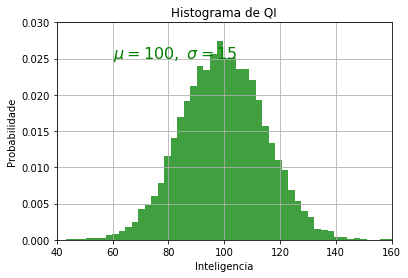

In [17]:
np.random.seed(19680801)

mu, sigma = 100, 15
val = mu + sigma * np.random.randn(10000)

# Histograma eh outro tipo de grafico
n, bins, patches = plt.hist(val, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Inteligencia')
plt.ylabel('Probabilidade')
plt.title('Histograma de QI')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$',color='g',fontsize=16)#qualquer texto que secoloque vai ficar nessas coordenadas
plt.axis([40, 160, 0, 0.03])
plt.grid(True)# põe essas retas x e y na imagem
plt.show()

Todas as funções de texto retornam um objeto que você pode alterar as propriedades, da mesma forma que as linhas:

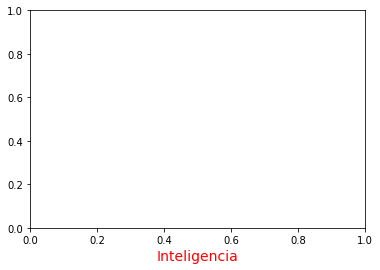

In [18]:
t = plt.xlabel('Inteligencia', fontsize=14, color='red')

A função `legend()` adiciona uma caixa de legendas para identificar as curvas no plot:

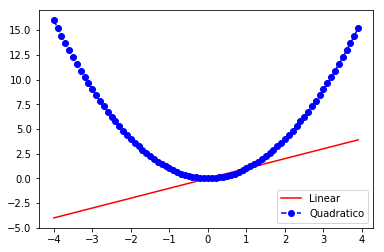

In [19]:
x = y = np.arange(-4,4,0.1)
plt.plot(x,y,"r-",x,y**2,"bo--")
plt.legend(['Linear','Quadratico']) #adiciona caixinha de legenda

Muitas vezes você quer adicionar um texto a uma parte de um gráfico com algum tipo de indicação. Para isto você pode usar o comando `annotate()`. Ele adiciona texto a um ponto especifico do gráfico. Ele tem duas coordenadas importantes: O `xy` do ponto anotado e o `xytext`, que é a posição onde o texto estará.

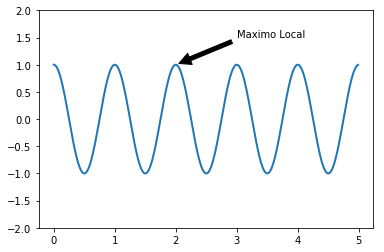

In [20]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('Maximo Local', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2) # dizer o min e max do y do gráfico
plt.show()

Text(1.9,1,'b')

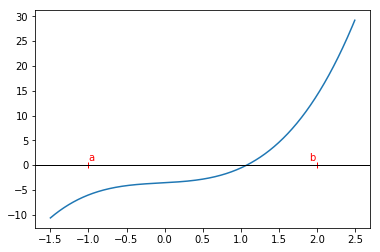

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x2 = np.linspace(-1.5,2.5,1000)
y2 = 2*x2**3-np.cos(x2+1)-3

plt.plot(x2,y2,-1,0,'r|',2,0,'r|')
plt.axhline(0, color='black',linewidth=1)
plt.annotate('a',xy=(-1,0),xytext=(-1,1),color="red")
plt.annotate('b',xy=(2,0),xytext=(1.9,1),color="red")

## Eixos não lineares

Muitas vezes, quando temos dados em escala maiores, é normal mostrar os dados em escalas logaritimas ou logit. No matplotlib isso é tão simples quanto `xscale('log')`

A galera geralmente plota o gráfico em escala logarítmica, para que haja a escala exponencial.

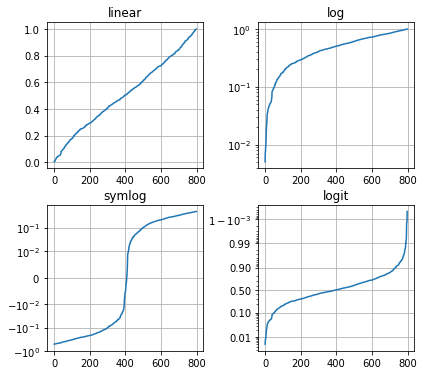

In [22]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

np.random.seed(19680801)

y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))


plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)

plt.gca().yaxis.set_minor_formatter(NullFormatter())

plt.subplots_adjust(top=1.22, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

## Outros embelezamentos

Vamos tentar agora visualizar outros pequenos detalhes que podemos modificar no gráfico para ele ficar mais interessante. Vamos pegar um plot simples de seno e cosseno:

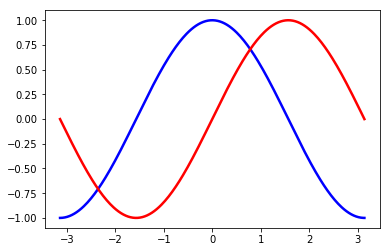

In [23]:

X = np.linspace(-np.pi, np.pi, 256, endpoint=True) #endpoint ( é intervalo fechado ou não)
C,S = np.cos(X), np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

plt.show()

Se achamos que a figura está muito apertada para os dados, podemos alterar os limites do gráfico. Vamos também adicionar uma legenda ao gráfico:

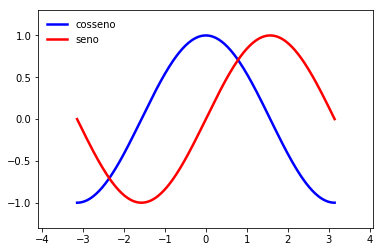

In [24]:
plt.xlim(X.min()*1.3, X.max()*1.3)
plt.ylim(C.min()*1.3, C.max()*1.3)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosseno")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="seno")

plt.legend(loc='upper left', frameon=False)

plt.show()

Os pontos nos eixos não estão ideais. Afinal, estamos falando de ângulos, então o ideal seria valores baseados em $\pi$. Para mudar os pontos nos eixos (chamados _ticks_), faça:

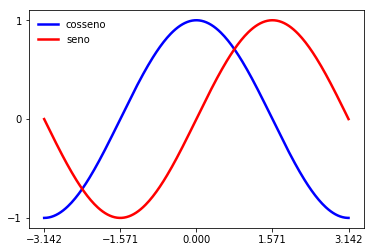

In [25]:
plt.xticks( [-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosseno")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="seno")

plt.legend(loc='upper left', frameon=False)

plt.show()

Vish, os pontos em pi tão corretos, mas os valores estão palha. Não seria legal se os valores fossem frações de $\pi$?

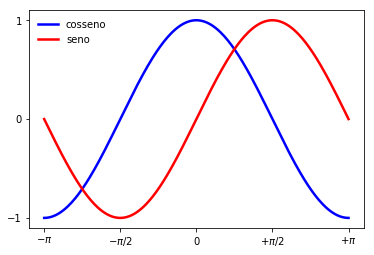

In [26]:
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']) #notação de fórmula em latex
#chame -n.pi (número pi em float) de -pi(algarismo/símbolo que representa o pi), etc
plt.yticks([-1, 0, +1])

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosseno")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="seno")

plt.legend(loc='upper left', frameon=False)

plt.show()

O gráfico está dentro de uma caixa. Não seria melhor que eles estivecem como uma cruz na origem?

Spines são as linhas aonde os _ticks_ ficam, e elas podem ser movidas para qualquer posição.

Vamos eliminar as linhas de cima e da direita, e colocar a da esquerda e a de baixo centralizadas no gráfico:

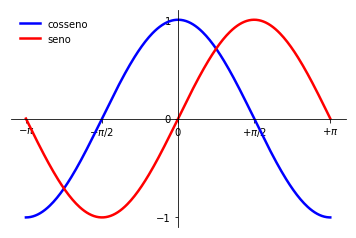

In [27]:
ax = plt.gca()
ax.spines['right'].set_color('none') #borda do gráfico do lado direito não é mostrado
ax.spines['top'].set_color('none') #borda do gráfico do lado esquerdo não é mostrado
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, +1])

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosseno")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="seno")

plt.legend(loc='upper left', frameon=False)

plt.show()

E se a gente quiser marcar pontos específicos no gráfico e destacar? Por exemplo, gostariamos de ver no gráfico onde fica o ponto $2\pi/3$ nas duas funções. Vamos marcar as posições com um ponto, e vamos também fazer uma reta pontilhada até eles:

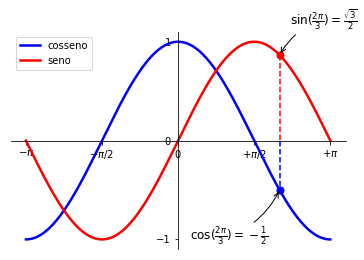

In [28]:
ax = plt.gca()
ax.spines['right'].set_color('none') #borda do gráfico do lado direito não é mostrado
ax.spines['top'].set_color('none') #borda do gráfico do lado esquerdo não é mostrado
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, +1])

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosseno")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="seno")

plt.legend(loc='upper left')


t = 2*np.pi/3
#Plota a linha
plt.plot([t,t],[np.sin(t),0], color ='r', linewidth=1.5, linestyle="--")
plt.plot([t,t],[0,np.cos(t)], color ='b', linewidth=1.5, linestyle="--")


#plota os pontos usando a funcao scatter
plt.scatter([t,],[np.cos(t),], 50, color ='blue')
plt.scatter([t,],[np.sin(t),], 50, color ='red')


plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)),
             xytext=(+10, +30), textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)),
             xytext=(-90, -50), textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.show()

Agora com esse monte de coisas tá meio ruim de ler os _ticks_ né? Tem como aumentar a fonte dele?

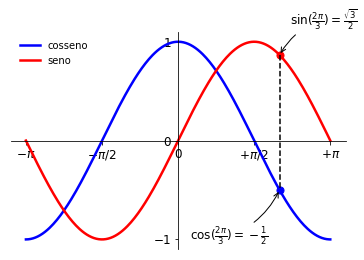

In [29]:
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, +1])

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosseno")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="seno")

plt.legend(loc='upper left', frameon=False)


t = 2*np.pi/3
#Plota a linha
plt.plot([t,t],[np.sin(t),np.cos(t)], color ='black', linewidth=1.5, linestyle="--")

#plota os pontos usando a funcao scatter
plt.scatter([t,],[np.cos(t),], 50, color ='blue')
plt.scatter([t,],[np.sin(t),], 50, color ='red')


plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)),
             xytext=(+10, +30), textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)),
             xytext=(-90, -50), textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

#Altera os ticks
for label in ax.get_xticklabels() + ax.get_yticklabels(): #for para andar pelo conjunto de pontos
    label.set_fontsize(12)  #aumenta a fonte


plt.show()

Legal né?

### Agora vocês não tem mais desculpa para fazer gráficos feios!

In [49]:
##def lagrange(c):
 ##   if c[0] < 0 :
  ##      c *= (-1)
  ##  else:
    ##    for i in range(len(c)):
            

def lagrandeandre(c):
    iprim = 0
    maior = 0
    if c[0] < 0 :
        c *= (-1)
    else:
        for i in range(len(c)):
            if iprim == 0 and c[i]<0:
                iprim = len(c)-i
            if c[i] < 0 and c[i]*(-1) > maior:
                maior = -1 * c[i]
        l = 1 + maior(c[0])**(1/len(c)-iprim)
        return l

    
c = np.array([1,2,-13,-14,24])
print(lagrandeandre(c))

TypeError: 'numpy.int64' object is not callable